In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("insurance.csv")
data = data.to_numpy()
data = data.astype(np.float128)

AttributeError: module 'numpy' has no attribute 'float128'

In [4]:
x_train = data[:,:3]
y_train = data[:,3]

In [ ]:
x_train.dtype

dtype('float128')

قسمت الف


ابتدا در کلاس linear_regresion متغیر های مورد نظر مانند نرخ یادگیری و... قرار داده شده است و سپس سه نوع برازش خطی Mini-batch GD و Batch GD و SGD هر کدام در یک تابع جدا پیاده سازی شده اند.

توجه داشته باشید مقداردهی اولیه متغیر های تتا به صورت عددی تصادفی بین صفر و یک میباشد بنابراین ممکن است کمی این مقدار دهی در اعداد نهایی بدست آمده تغییر ایجاد کنند.




In [6]:
class linear_regresion:
  def __init__(self,x_train, learning_rate=0.00001,iteration=200,batch_size=64):
      np.random.seed(1)
      self.number_of_features = x_train.shape[1]
      self.number_of_training_examples = x_train.shape[0]
      self.learning_rate = learning_rate
      self.iteration = iteration
      self.batch_size = batch_size
      self.theta = np.random.rand(self.number_of_features + 1)
      self.cost = np.zeros((iteration))

  def reset_parameters(self,learning_rate=0.00001, iteration=200, batch_size=64):
      np.random.seed(1)
      self.learning_rate = learning_rate
      self.iteration = iteration
      self.batch_size = batch_size
      self.theta = np.random.rand(self.number_of_features + 1)
      self.cost = np.zeros((iteration))

In [7]:
Regression = linear_regresion(x_train)

In [8]:
def hypothesis(theta,x_train):
  h_theta = np.zeros((x_train.shape[0]))
  for i in range(x_train.shape[0]):
    h_theta[i] = np.matmul(x_train[i],theta[1:]) + theta[0]
  return h_theta

In [9]:
def cost_function(h,y,m):
  return (1 / (2 * m) ) * sum(np.square(h - y))

In [10]:
def plot(iterations,y1,y2,y3,title=None):
   x = [i for i in range(iterations)]
   plt.plot(x,y1, label ='BGD')
   plt.plot(x,y2, label ='SGD')
   plt.plot(x,y3, label ='MiniBatch')
   plt.xlabel('Ittertion')
   plt.ylabel("Cost")
   plt.title(title)
   plt.legend()
   plt.show()

In [11]:
def BGD(Regression):
  for iter in range(Regression.iteration):
    h = hypothesis(Regression.theta,x_train)
    Regression.theta[0] = Regression.theta[0] - (Regression.learning_rate/x_train.shape[0]) * sum(h - y_train)
    for j in range(1,Regression.number_of_features + 1):
      Regression.theta[j] = Regression.theta[j] - (Regression.learning_rate/x_train.shape[0]) * np.sum((h-y_train) * x_train.transpose()[j-1])
    h = hypothesis(Regression.theta, x_train)
    Regression.cost[iter] = cost_function(h,y_train,x_train.shape[0])
  return Regression.cost, Regression.theta

In [12]:
def SGD(Regression):
  for iter in range(Regression.iteration):
    for k in range(Regression.number_of_training_examples):
      h = hypothesis(Regression.theta,np.reshape(x_train[k],(1,-1)))
      Regression.theta[0] = Regression.theta[0] - (Regression.learning_rate) * (h[0] - y_train[k])
      for j in range(1,Regression.number_of_features + 1):
        Regression.theta[j] = Regression.theta[j] - (Regression.learning_rate) * (h-y_train[k]) * x_train[k].transpose()[j-1]
    h =  np.array(hypothesis(Regression.theta, x_train))
    Regression.cost[iter] = cost_function(h,y_train,x_train.shape[0])
  return Regression.cost, Regression.theta

In [13]:
def MiniBatch(Regression):
  for iter in range(Regression.iteration):
    for k in range(Regression.number_of_training_examples//Regression.batch_size):
      h = hypothesis(Regression.theta,x_train[k*Regression.batch_size:(k+1)*Regression.batch_size])
      Regression.theta[0] = Regression.theta[0] - (Regression.learning_rate/Regression.batch_size) * sum(h - y_train[k*Regression.batch_size:(k+1)*Regression.batch_size])
      for j in range(1,Regression.number_of_features + 1):
        Regression.theta[j] = Regression.theta[j] - (Regression.learning_rate) * np.sum((h-y_train[k*Regression.batch_size:(k+1)*Regression.batch_size]) * x_train[k*Regression.batch_size:(k+1)*Regression.batch_size].transpose()[j-1])
    h = np.array(hypothesis(Regression.theta, x_train))
    Regression.cost[iter] = cost_function(h,y_train,x_train.shape[0])
  return Regression.cost, Regression.theta  

حال پس از این پیاده سازی ها این برازش خطی را برای هر سه روش پیاده میکنیم

In [14]:
Regression.reset_parameters()
BGD_cost, BGD_theta = BGD(Regression)
Regression.reset_parameters()
SGD_cost, SGD_theta = SGD(Regression)
Regression.reset_parameters()
Mini_cost, Mini_theta = MiniBatch(Regression)

قسمت ب

الان سه تابع پیاده شده را در قالب یک نمودار در اخیتار داریم تو
الگوریتم BGD و MiniBatch همگرایی بیشتری دارند

همچنین این دو روش کمینه خطای کمتری را دارند.

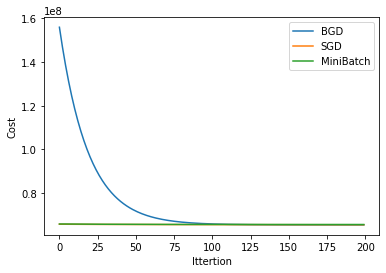

In [15]:
plot(Regression.iteration,BGD_cost,SGD_cost,Mini_cost)

قسمت ج

الان نرخ یادگیری را برابر 0.0000001 قرار میدهیم تا تاثیر آن را ببینیم:
همانطور که پیدا است با کاهش قابل توجه نرخ یادگیری این سه روش 
همگرایی بیشتری دارند و همچنین در هر سه مورد شاهد خطای کمتری میباشیم.
همچنین با تعداد اجرای کمتر به کمینه خطای مورد نظر میرسیم.

In [16]:
Regression.reset_parameters(learning_rate=0.0000001)
BGD_cost, BGD_theta = BGD(Regression)
Regression.reset_parameters(learning_rate=0.0000001)
SGD_cost, SGD_theta = SGD(Regression)
Regression.reset_parameters(learning_rate=0.0000001)
Mini_cost, Mini_theta = MiniBatch(Regression)

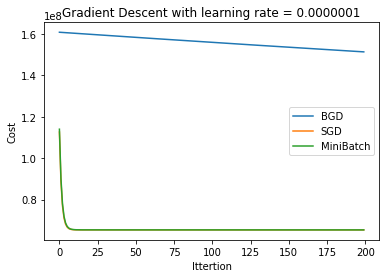

In [17]:
plot(Regression.iteration,BGD_cost,SGD_cost,Mini_cost, title="Gradient Descent with learning rate = 0.0000001")

قسمت د 

نرخ یادگیری را برابر به حالت اولیه 10 برابر میکنیم
و توجه میشویم در هر سه روش بیان شده شاهد خطای بیشتری هستیم و همچنین بدلیل بزرگ شدن خطای بدست آمده شاهد اورفلو شدن میباشیم که این عدد بزرگ برای این الگوریتم ها اصلا مناسب نیست.

In [18]:
Regression.reset_parameters(learning_rate=0.0001)
BGD_cost, BGD_theta = BGD(Regression)
Regression.reset_parameters(learning_rate=0.0001)
SGD_cost, SGD_theta = SGD(Regression)
Regression.reset_parameters(learning_rate=0.0001)
Mini_cost, Mini_theta = MiniBatch(Regression)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


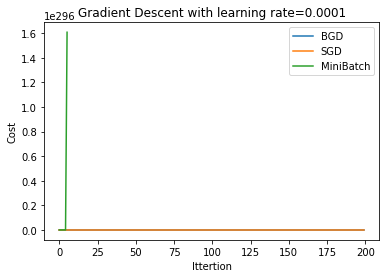

In [19]:
plot(Regression.iteration,BGD_cost,SGD_cost,Mini_cost, title="Gradient Descent with learning rate=0.0001")

قسمت ه

با استفاده از تابع استفاده شده در سلول زیر ابتدا داده ها نرمال میکنیم و هر کدام از ستون ویژگی ها در بازه صفر تا یک قرار میگیرند و در نتیجه نسب به حالات قبل شاهد خطای بسیار کمتر و همگرایی بیشتری میباشیم چون اعداد در بازه های منطقی قرار گرفته اند.

In [20]:
scaler = MinMaxScaler()
scaler.fit(data)
data = scaler.transform(data)
x_train = data[:,:3]
y_train = data[:,3]

In [21]:
Regression.reset_parameters()
BGD_cost, BGD_theta = BGD(Regression)
Regression.reset_parameters()
SGD_cost, SGD_theta = SGD(Regression)
Regression.reset_parameters()
Mini_cost, Mini_theta = MiniBatch(Regression)

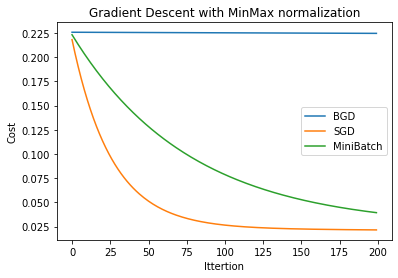

In [22]:
plot(Regression.iteration,BGD_cost,SGD_cost,Mini_cost, title="Gradient Descent with MinMax normalization")

قسمت ز



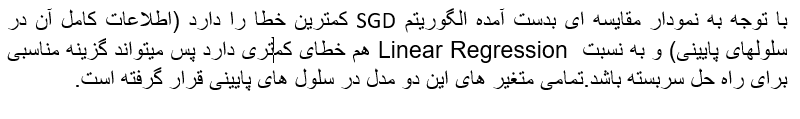

In [23]:
Reg = LinearRegression()
Reg.fit(x_train,y_train)
print(f"LinearRegression cost: {Reg.score(x_train,y_train)} \nTheta values: {Reg.intercept_} {Reg.coef_}")

LinearRegression cost: 0.1200981957624696 
Theta values: 0.02524932633235566 [0.17621709 0.19702831 0.04332619]


In [24]:
print(f"Minimum cost:{SGD_cost[-1]} \nTheta values: {SGD_theta}")

Minimum cost:0.02161416491872775 
Theta values: [ 0.01004253  0.44816961 -0.14366308  0.18371121]


متین فاضل 
شماره دانشجویی : 9825583

سلام وقت بخیر
توی قسمت د سوال 2 تمرین عملی 1 من نصف نمره رو نگرفتم ولی طبق سوال برای هر دو حالت انجام دادم اگر امکانش هست این قسمت رو چک کنید